In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from censai.data.lenses_tng import decode_all
from astropy.visualization import ImageNormalize, LogStretch

In [3]:
datapath = "/home/aadam/scratch/Censai/data/lenses_TNG100/"
filenames = glob.glob(os.path.join(datapath, "*.tfrecords"))
data = tf.data.TFRecordDataset(filenames).map(decode_all)

In [4]:
kappas = []
galaxies = []
lenses = []
einstein_radius = []
einstein_radius_init = []
ps = []
i = 0
for example in data:
    kappas.append(example['kappa'])
    galaxies.append(example['source'])
    lenses.append(example['lens'])
    einstein_radius.append(example['Einstein radius'].numpy())
    einstein_radius_init.append(example['Einstein radius before rescaling'].numpy())
    ps.append(example['power spectrum'])
    i += 1
    if i == 1000:
        break

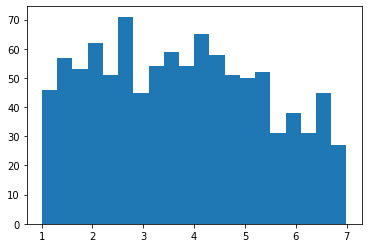

In [5]:
plt.hist(einstein_radius, bins=20);

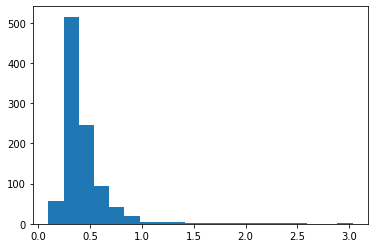

In [6]:
plt.hist(einstein_radius_init, bins=20);

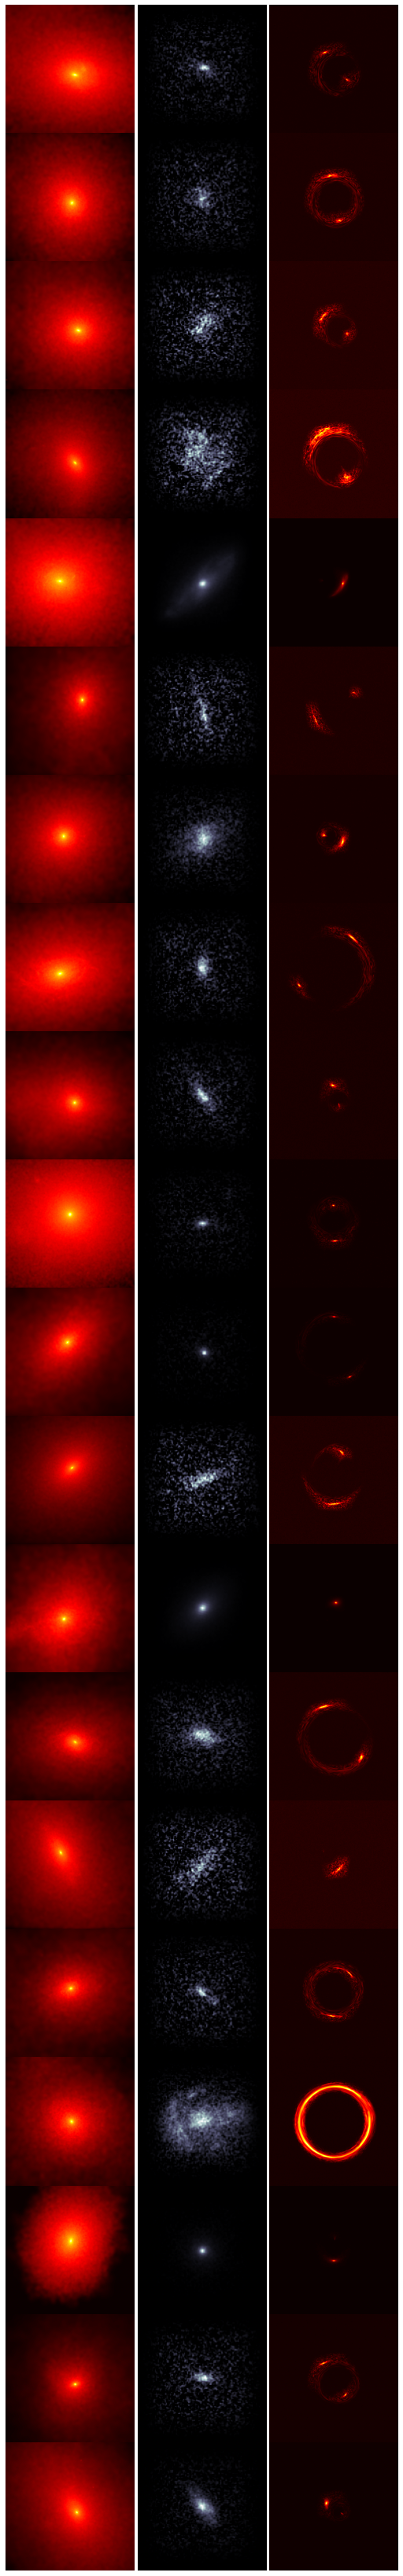

In [11]:
fig, axs = plt.subplots(20, 3, figsize=(9, 60))
start = 120
for i in range(0, 20):
    axs[i, 0].imshow(kappas[i+start][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 1].imshow(galaxies[i+start][..., 0], cmap="bone")
    axs[i, 2].imshow(lenses[i+start][..., 0], cmap="hot")
    for j in range(3):
        axs[i, j].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)